In [2]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_excel('data_bersih.xlsx')

# Reset indeks dan Tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Definisikan dan sesuaikan model regresi Pendapatan vs Usia
model_usia_pendapatan = smf.ols('Pendapatan ~ Usia', data=df).fit()

# Mengambil koefisien dari model regresi pendapatan vs usia
intercept_usia_pendapatan = model_usia_pendapatan.params['Intercept']
usia_coef_pendapatan = model_usia_pendapatan.params['Usia']

# Mengambil Jumlah kuadrat Residual (SSR) dari model baru
ssr_usia_pendapatan = model_usia_pendapatan.ssr

print(f"Jumlah Kuadrat Residual (SSR) untuk Pendapatan vs Usia: {ssr_usia_pendapatan:.4f}")
print(f"Persamaan Garis Regresi (pendapatan vs Usia): ")
print(f"Pendapatan_prediksi = {intercept_usia_pendapatan:.4f} + {usia_coef_pendapatan:.4f} * Usia")

Jumlah Kuadrat Residual (SSR) untuk Pendapatan vs Usia: 3596284929633566.5000
Persamaan Garis Regresi (pendapatan vs Usia): 
Pendapatan_prediksi = 11549519.0745 + 9784.5599 * Usia


Hasil Uji Shapiro-Wilk untuk Pendapatan: Statistik=0.9561, p-value=0.0001
Data Kemungkinan tidak berdistibusi normal (tolak H0)


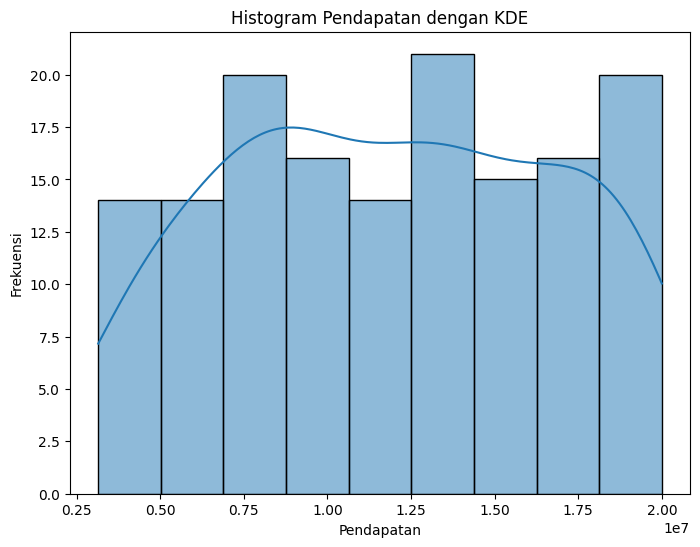

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Pendapatan'])
print(f"Hasil Uji Shapiro-Wilk untuk Pendapatan: Statistik={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data Kemungkinan berdistibusi normal (gagal tolak H0)")
else:
    print("Data Kemungkinan tidak berdistibusi normal (tolak H0)")
plt.figure(figsize=(8, 6))
sns.histplot(df['Pendapatan'], kde=True)
plt.title('Histogram Pendapatan dengan KDE')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()